In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
from shapely.geometry.polygon import Polygon
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap
from matplotlib import cm
import xarray as xr
import pandas as pd

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


# Slope index

In [29]:
ind1 = (np.array(mesh.topo > 300) & np.array(mesh.topo < 800))
ind2 = ~(np.array(mesh.y2 < 75) & np.array(np.abs(mesh.x2) < 80))
ind3 = ~(np.array(mesh.y2 < 66) & np.array(np.abs(mesh.x2) >= 80))
ind4 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 < -20) & np.array(mesh.x2 > -100))
ind5 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 > -20) & np.array(mesh.x2 < 0))
ind6 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 > 20) & np.array(mesh.x2 < 60))

ind_bio=ind1&ind2&ind3&ind4&ind5&ind6
ind_bio_slope = np.where(ind_bio)

In [45]:
ind_bio_slope = np.squeeze(ind_bio_slope)
ind_bio_slope

array([ 76300,  76303,  76307, ..., 711906, 711930, 711931])

In [46]:
np.shape(ind_bio_slope)

(33050,)

# Eurasian & Amerasian index 

In [37]:
print('loading index...')
df = pd.read_csv(meshpath+'/bioregion_index_latlon.csv', delimiter=',',header=0)
print('LOADING DONE')
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
print('SORTING...')
names = df.Name.unique().tolist()
names.pop(-1)
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66N)')
print('CLEANING DONE...')

loading index...
LOADING DONE
SORTING...
CLEANING DONE...


In [38]:
ind_bio_eurasian = df.full_index[df.Unique_ID == 24]
ind_bio_amerasian = df.full_index[df.Unique_ID == 25]

In [47]:
ind_bio_eurasian = np.squeeze(ind_bio_eurasian)
ind_bio_amerasian = np.squeeze(ind_bio_amerasian)

In [50]:
print ind_bio_eurasian.shape
print ind_bio_amerasian.shape

(67809,)
(105767,)


In [52]:
ind_bio_amerasian

array([191974, 191973, 191975, ..., 155939, 155940, 155938])

# Visual inspection

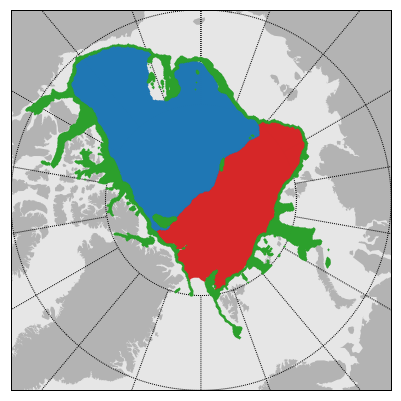

In [53]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)


ax1      = fig.add_subplot(121)
map = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,10.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.7',lake_color='.7')
plt.plot(x[ind_bio_eurasian], y[ind_bio_eurasian], '.', color = 'tab:red', markersize =1)
plt.plot(x[ind_bio_amerasian], y[ind_bio_amerasian], '.', color = 'tab:blue', markersize =1)
plt.plot(x[ind_bio_slope], y[ind_bio_slope], '.', color = 'tab:green', markersize =1)

# All studied area

In [60]:
ind_all = np.hstack((ind_bio_amerasian,ind_bio_eurasian,ind_bio_slope))

In [61]:
ind_all

array([191974, 191973, 191975, ..., 711906, 711930, 711931])

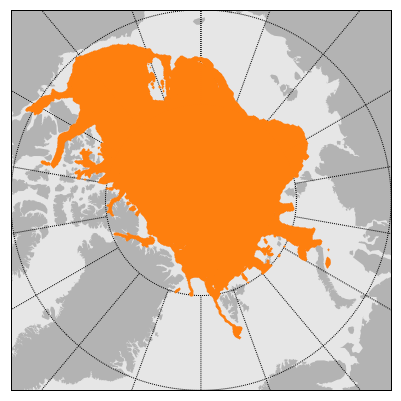

In [62]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)


ax1      = fig.add_subplot(121)
map = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,10.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.7',lake_color='.7')
plt.plot(x[ind_all], y[ind_all], '.', color = 'tab:orange', markersize =1)

# Exporting 

In [63]:
np.save('index_eurasian.npy', ind_bio_eurasian)
np.save('index_amerasian.npy', ind_bio_amerasian)
np.save('index_slope.npy', ind_bio_slope)
np.save('index_all.npy', ind_all)